Build the Dataset from the prepared images folders

In [1]:
from classificationmodel.dataset import dataset_generator
import configparser
import json
# Specify the absolute file path of the configuration file
config_file_path = 'classificationmodel/config.json'

# Load the configuration file
config = configparser.ConfigParser()
# Read the JSON configuration file
with open(config_file_path) as config_file:
    config = json.load(config_file)

# Access configuration values
train_params = config['setting']['train_params']
img_path = config['path']['img_path']
test_img_path = config['path']['test_img_path']

train_set, val_set, test_set = dataset_generator(img_path,
                                                 test_img_path,
                                                 train_params)

2023-07-14 10:15:02.500730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-14 10:15:02.500781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 1000 files belonging to 4 classes.
Using 900 files for training.
Found 1000 files belonging to 4 classes.
Using 100 files for validation.


2023-07-14 10:15:06.002511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-14 10:15:06.002563: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-14 10:15:06.002584: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-EDANTKA): /proc/driver/nvidia/version does not exist
2023-07-14 10:15:06.002890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 100 files belonging to 4 classes.


Visualize some images

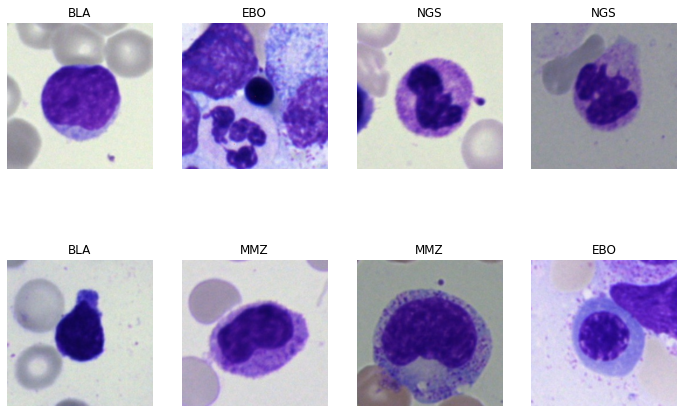

In [2]:
from classificationmodel.dataset import image_visualization
classes = config['setting']['classes']

image_visualization(train_set, classes)

Initialize the EfficientNet model

Loading pre-trained model from file...
Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: 0.3655 - accuracy: 0.8744
Epoch 1: val_accuracy improved from -inf to 0.78000, saving model to best_efficientnet_30epochs.h5
113/113 [==============================] - 864s 7s/step - loss: 0.3655 - accuracy: 0.8744 - val_loss: 0.8262 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: 0.3418 - accuracy: 0.8811
Epoch 2: val_accuracy improved from 0.78000 to 0.81000, saving model to best_efficientnet_30epochs.h5
113/113 [==============================] - 790s 7s/step - loss: 0.3418 - accuracy: 0.8811 - val_loss: 0.6338 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: 0.2814 - accuracy: 0.8978
Epoch 3: val_accuracy did not improve from 0.81000
113/113 [==============================] - 813s 7s/step - loss: 0.2814 - accuracy: 0.8978 - val_loss: 1.4158 - val_accuracy: 0.7000

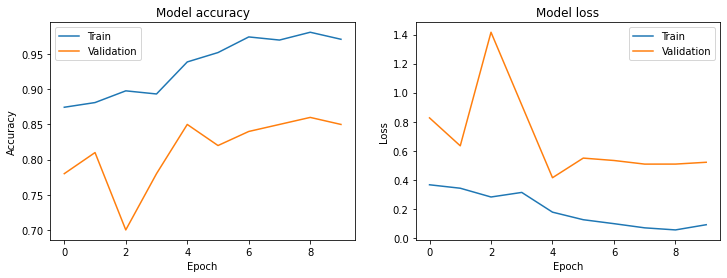

In [3]:
from classificationmodel.model import (build_model, 
                                       train_model, 
                                       load_model_weights,
                                       save_model, 
                                       plot_history)
num_classes = config['setting']['num_classes']
batch = config['setting']['batch']
epochs = config['setting']['epochs']
weight_path = config['path']['weight_path']
model_path = config['path']['model_path']

efficientNet = build_model(num_classes)
pretrained_model = load_model_weights(efficientNet, weight_path)
model_history, trained_model = train_model(pretrained_model,
                                            train_set, 
                                            val_set, 
                                            batch, 
                                            epochs,
                                            weight_path)
saved_model = save_model(trained_model, model_path)
plot_history(model_history)

Evaluate the trained model

In [4]:
from classificationmodel.evaluation import evaluate_model, evaluation_report
output_report = config['path']['output_report']
output_evaluation = config['path']['output_evaluation']
evaluation_loss, evaluation_accuracy = evaluate_model(trained_model, test_set, output_evaluation)
dict_report, str_report = evaluation_report(test_set, trained_model, classes, output_report)


13/13 [==============================] - 23s 2s/step - loss: 0.6654 - accuracy: 0.7800
Test Loss: 0.6654322147369385
Test Accuracy: 0.7799999713897705
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 746ms/step
              precision    recall  f1-score   support

         BLA       0.67      0.72      0.69        25
         EBO       0.77      0.80      0.78        25
         MMZ       0.71      0.68      0.69        25
         NGS       1.00      0.92      0.96        25

    accuracy                           0.78       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100

